In [23]:
import random

class Chromosome():
    def __init__(self, Func, x = None, y = None):
        self.x = x
        self.y = y
        self.Func = Func
        self.fitness = None
    
    def Crossover(self, other):
        child1 = Chromosome(self.Func, self.x, other.y)
        child2 = Chromosome(self.Func, other.x, self.y)
        return (child1, child2)
    
    def Mutate(self, threshold):
        self.x = self.x + random.uniform(-threshold, threshold) if random.random() > 0.9 else self.x
        self.y = self.y + random.uniform(-threshold, threshold) if random.random() > 0.9 else self.y
    
    def RandInst(self, xmin, xmax, ymin, ymax):
        self.x = random.uniform(xmin, xmax)
        self.y = random.uniform(ymin, ymax)
    
    def FF(self):
        if self.fitness is None:
            self.fitness = self.Func(self.x, self.y)
        return self.fitness
    
class GeneticAlgorithm():
    def __init__(self, Func, PopSize = 50, GenLimit = 100, TournamentSize = 2, Elite = 5,
                 xmin = -50, xmax = 50, ymin = -50, ymax = 50):
        self.Func = Func
        self.PopSize = PopSize
        self.TournamentSize = TournamentSize
        self.Elite = Elite
        self.GenLimit = GenLimit
        self.Population = []
        self.TemporaryPopulation = [0 for i in range(2*PopSize)]
        self.PopulationInit(xmin, xmax, ymin, ymax)
        self.History = []
    
    def Run(self):
        self.EvaluateFF(self.Population)
        self.History.append(self.MeanFF())
        for i in range(self.GenLimit):
            self.Offsprings()
            self.Mutation()
            self.EvaluateFF(self.TemporaryPopulation)
            self.NewPopulation()
            self.History.append(self.MeanFF())
    
    def PopulationInit(self, xmin, xmax, ymin, ymax):
        for i in range(self.PopSize):
            self.Population.append(Chromosome(self.Func))
            self.Population[i].RandInst(xmin, xmax, ymin, ymax)
    
    def EvaluateFF(self, Pop):
        for i in range(len(Pop)):
            Pop[i].FF()
    
    def Selection(self):
        Candidates = random.choices(self.Population, k=self.TournamentSize)
        best = 0
        for i in range(len(Candidates)):
            if Candidates[i].FF() < Candidates[best].FF():
                best = i
        return Candidates[best]
        
    def Offsprings(self):
        for i in range(self.PopSize):
            parent1 = self.Selection()
            parent2 = self.Selection()
            child1, child2 = parent1.Crossover(parent2)
            self.TemporaryPopulation[i] = child1
            self.TemporaryPopulation[i+self.PopSize] = child2
            
    def Mutation(self):
        for i in range(len(self.TemporaryPopulation)):
            self.TemporaryPopulation[i].Mutate(1)
    
    def NewPopulation(self):
        sorted(self.Population, key = lambda x: x.FF())
        sorted(self.TemporaryPopulation, key = lambda x: x.FF())
        j=0
        for i in range(self.Elite):
            if self.Population[i].FF() > self.TemporaryPopulation[j].FF():
                self.Population[i] = self.TemporaryPopulation[j]
                j+=1
        for i in range(self.Elite, self.PopSize):
            self.Population[i] = self.TemporaryPopulation[j]
            j+=1
            
    def MeanFF(self):
        SumFF = 0
        for i in range(len(self.Population)):
            SumFF = self.Population[i].FF()
        return SumFF/len(self.Population)
        
            

In [24]:
def func(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

In [25]:
G = GeneticAlgorithm(func, PopSize = 100, GenLimit = 40, TournamentSize = 4)
G.Run()

In [26]:
print('x =', G.Population[0].x)
print('y =', G.Population[0].y)
print('F(%f, %f) = %f' % (G.Population[0].x, G.Population[0].y, G.Population[0].FF()))

x = 0.8461888832802902
y = 3.1588464660428484
F(0.846189, 3.158846) = 0.048991


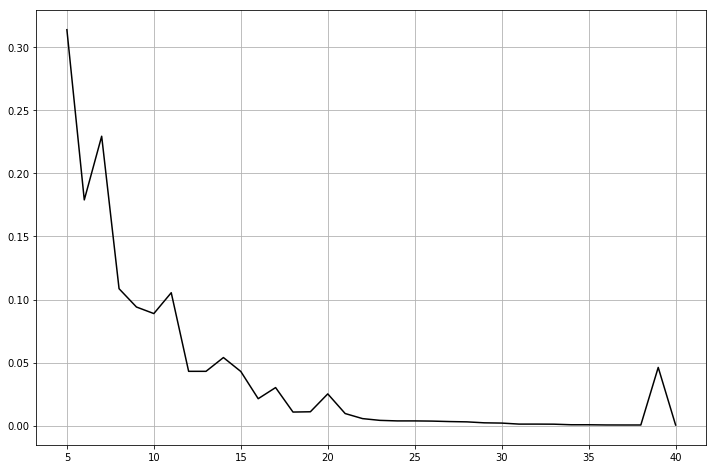

In [27]:
import matplotlib.pyplot as plt

start = 5
stop = len(G.History)
step = 1

fig = plt.figure(figsize=(12,8))
graph0 = plt.plot([i for i in range(start, stop, step)], G.History[start:stop:step], color = 'black')
grid1 = plt.grid(True)
plt.show()